# 案例2: 构建自己的多层感知机: MNIST 手写数字识别

### 本案例要求如下
- #### 实现SGD优化器 (`./optimizer.py`)
- #### 实现全连接层FCLayer前向和后向计算 (`layers/fc_layer.py`)
- #### 实现激活层SigmoidLayer前向和后向计算 (`layers/sigmoid_layer.py`)
- #### 实现激活层ReLULayer前向和后向计算 (`layers/relu_layer.py`)
- #### 实现损失层EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### 实现损失层SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

/Users/chaoxiong.yang/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 读入MNIST数据集

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # 归一化处理
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # 将标签变为one-hot编码
    return tf.one_hot(label, depth=10)

In [4]:
# 数据预处理
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## 超参数设置

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. 使用欧式距离损失训练多层感知机(MLP with Euclidean Loss)
第一部分将使用欧式距离损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.
### TODO
执行以下代码之前，请完成 **./optimizer.py** 和 **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 使用欧式距离损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和Sigmoid激活函数.

### TODO
执行以下代码之前，请完成 **layers/fc_layer.py** 和 **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Metal device set to: Apple M1 Pro


2022-09-20 21:02:25.860230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-20 21:02:25.860883: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-20 21:02:26.031853: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-09-20 21:02:26.043043: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch [0][20]	 Batch [0][550]	 Training Loss 26.2506	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 8.2680	 Accuracy 0.1925
Epoch [0][20]	 Batch [100][550]	 Training Loss 6.5154	 Accuracy 0.2815
Epoch [0][20]	 Batch [150][550]	 Training Loss 5.8323	 Accuracy 0.3462
Epoch [0][20]	 Batch [200][550]	 Training Loss 5.4116	 Accuracy 0.4067
Epoch [0][20]	 Batch [250][550]	 Training Loss 5.1286	 Accuracy 0.4604
Epoch [0][20]	 Batch [300][550]	 Training Loss 4.9187	 Accuracy 0.5042
Epoch [0][20]	 Batch [350][550]	 Training Loss 4.7571	 Accuracy 0.5395
Epoch [0][20]	 Batch [400][550]	 Training Loss 4.6244	 Accuracy 0.5688
Epoch [0][20]	 Batch [450][550]	 Training Loss 4.5101	 Accuracy 0.5937
Epoch [0][20]	 Batch [500][550]	 Training Loss 4.4126	 Accuracy 0.6150

Epoch [0]	 Average training loss 4.3266	 Average training accuracy 0.6333
Epoch [0]	 Average validation loss 3.3201	 Average validation accuracy 0.8448

Epoch [1][20]	 Batch [0][550]	 Training Loss 3.2892	 Accuracy 0.830


Epoch [8]	 Average training loss 2.2496	 Average training accuracy 0.9181
Epoch [8]	 Average validation loss 2.0489	 Average validation accuracy 0.9384

Epoch [9][20]	 Batch [0][550]	 Training Loss 2.0557	 Accuracy 0.9500
Epoch [9][20]	 Batch [50][550]	 Training Loss 2.1506	 Accuracy 0.9286
Epoch [9][20]	 Batch [100][550]	 Training Loss 2.1739	 Accuracy 0.9230
Epoch [9][20]	 Batch [150][550]	 Training Loss 2.2053	 Accuracy 0.9197
Epoch [9][20]	 Batch [200][550]	 Training Loss 2.1991	 Accuracy 0.9214
Epoch [9][20]	 Batch [250][550]	 Training Loss 2.1968	 Accuracy 0.9218
Epoch [9][20]	 Batch [300][550]	 Training Loss 2.1976	 Accuracy 0.9221
Epoch [9][20]	 Batch [350][550]	 Training Loss 2.2016	 Accuracy 0.9219
Epoch [9][20]	 Batch [400][550]	 Training Loss 2.2036	 Accuracy 0.9215
Epoch [9][20]	 Batch [450][550]	 Training Loss 2.2050	 Accuracy 0.9213
Epoch [9][20]	 Batch [500][550]	 Training Loss 2.2082	 Accuracy 0.9206

Epoch [9]	 Average training loss 2.2052	 Average training accuracy 

Epoch [17][20]	 Batch [400][550]	 Training Loss 1.9909	 Accuracy 0.9347
Epoch [17][20]	 Batch [450][550]	 Training Loss 1.9929	 Accuracy 0.9344
Epoch [17][20]	 Batch [500][550]	 Training Loss 1.9980	 Accuracy 0.9340

Epoch [17]	 Average training loss 1.9960	 Average training accuracy 0.9340
Epoch [17]	 Average validation loss 1.8219	 Average validation accuracy 0.9528

Epoch [18][20]	 Batch [0][550]	 Training Loss 1.8448	 Accuracy 0.9500
Epoch [18][20]	 Batch [50][550]	 Training Loss 1.9181	 Accuracy 0.9429
Epoch [18][20]	 Batch [100][550]	 Training Loss 1.9440	 Accuracy 0.9383
Epoch [18][20]	 Batch [150][550]	 Training Loss 1.9716	 Accuracy 0.9359
Epoch [18][20]	 Batch [200][550]	 Training Loss 1.9659	 Accuracy 0.9365
Epoch [18][20]	 Batch [250][550]	 Training Loss 1.9632	 Accuracy 0.9363
Epoch [18][20]	 Batch [300][550]	 Training Loss 1.9668	 Accuracy 0.9363
Epoch [18][20]	 Batch [350][550]	 Training Loss 1.9706	 Accuracy 0.9358
Epoch [18][20]	 Batch [400][550]	 Training Loss 1.9742	

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9388.



## 1.2 使用欧式距离损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和ReLU激活函数.

### TODO
执行以下代码之前，请完成 **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# 使用FCLayer和ReLULayer构建多层感知机
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 12.5907	 Accuracy 0.1600
Epoch [0][20]	 Batch [50][550]	 Training Loss 5.0506	 Accuracy 0.5016
Epoch [0][20]	 Batch [100][550]	 Training Loss 4.3306	 Accuracy 0.6279
Epoch [0][20]	 Batch [150][550]	 Training Loss 4.0040	 Accuracy 0.6843
Epoch [0][20]	 Batch [200][550]	 Training Loss 3.7769	 Accuracy 0.7230
Epoch [0][20]	 Batch [250][550]	 Training Loss 3.6080	 Accuracy 0.7495
Epoch [0][20]	 Batch [300][550]	 Training Loss 3.4852	 Accuracy 0.7679
Epoch [0][20]	 Batch [350][550]	 Training Loss 3.3850	 Accuracy 0.7821
Epoch [0][20]	 Batch [400][550]	 Training Loss 3.2994	 Accuracy 0.7940
Epoch [0][20]	 Batch [450][550]	 Training Loss 3.2272	 Accuracy 0.8040
Epoch [0][20]	 Batch [500][550]	 Training Loss 3.1669	 Accuracy 0.8115

Epoch [0]	 Average training loss 3.1076	 Average training accuracy 0.8188
Epoch [0]	 Average validation loss 2.3403	 Average validation accuracy 0.9220

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.2797	 Accuracy 0.930


Epoch [8]	 Average training loss 1.8831	 Average training accuracy 0.9494
Epoch [8]	 Average validation loss 1.7909	 Average validation accuracy 0.9606

Epoch [9][20]	 Batch [0][550]	 Training Loss 1.7884	 Accuracy 0.9700
Epoch [9][20]	 Batch [50][550]	 Training Loss 1.8041	 Accuracy 0.9553
Epoch [9][20]	 Batch [100][550]	 Training Loss 1.8358	 Accuracy 0.9511
Epoch [9][20]	 Batch [150][550]	 Training Loss 1.8551	 Accuracy 0.9509
Epoch [9][20]	 Batch [200][550]	 Training Loss 1.8485	 Accuracy 0.9519
Epoch [9][20]	 Batch [250][550]	 Training Loss 1.8450	 Accuracy 0.9522
Epoch [9][20]	 Batch [300][550]	 Training Loss 1.8534	 Accuracy 0.9513
Epoch [9][20]	 Batch [350][550]	 Training Loss 1.8547	 Accuracy 0.9512
Epoch [9][20]	 Batch [400][550]	 Training Loss 1.8567	 Accuracy 0.9511
Epoch [9][20]	 Batch [450][550]	 Training Loss 1.8556	 Accuracy 0.9514
Epoch [9][20]	 Batch [500][550]	 Training Loss 1.8608	 Accuracy 0.9507

Epoch [9]	 Average training loss 1.8561	 Average training accuracy 

Epoch [17][20]	 Batch [400][550]	 Training Loss 1.7121	 Accuracy 0.9622
Epoch [17][20]	 Batch [450][550]	 Training Loss 1.7120	 Accuracy 0.9621
Epoch [17][20]	 Batch [500][550]	 Training Loss 1.7176	 Accuracy 0.9613

Epoch [17]	 Average training loss 1.7141	 Average training accuracy 0.9615
Epoch [17]	 Average validation loss 1.6762	 Average validation accuracy 0.9670

Epoch [18][20]	 Batch [0][550]	 Training Loss 1.6460	 Accuracy 0.9700
Epoch [18][20]	 Batch [50][550]	 Training Loss 1.6480	 Accuracy 0.9678
Epoch [18][20]	 Batch [100][550]	 Training Loss 1.6785	 Accuracy 0.9639
Epoch [18][20]	 Batch [150][550]	 Training Loss 1.6947	 Accuracy 0.9630
Epoch [18][20]	 Batch [200][550]	 Training Loss 1.6896	 Accuracy 0.9638
Epoch [18][20]	 Batch [250][550]	 Training Loss 1.6852	 Accuracy 0.9642
Epoch [18][20]	 Batch [300][550]	 Training Loss 1.6959	 Accuracy 0.9631
Epoch [18][20]	 Batch [350][550]	 Training Loss 1.6970	 Accuracy 0.9629
Epoch [18][20]	 Batch [400][550]	 Training Loss 1.6995	

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9590.



## 绘制曲线

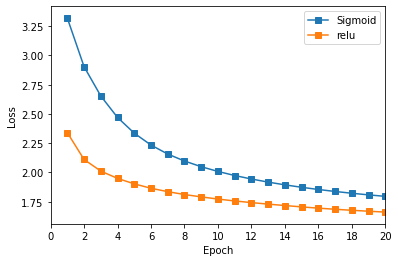

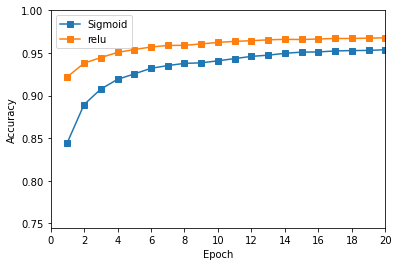

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. 使用Softmax交叉熵损失训练多层感知机(MLP with Softmax Cross-Entropy Loss)
第二部分将使用Softmax交叉熵损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.

### TODO
执行以下代码之前，请完成 **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 使用Softmax交叉熵损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和Sigmoid激活函数.

In [15]:
sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### 训练

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.8934	 Accuracy 0.1400
Epoch [0][20]	 Batch [50][550]	 Training Loss 1.8810	 Accuracy 0.5108
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.5511	 Accuracy 0.6375
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.3478	 Accuracy 0.6901
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.2056	 Accuracy 0.7251
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.0961	 Accuracy 0.7507
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.0136	 Accuracy 0.7690
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.9538	 Accuracy 0.7817
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.9001	 Accuracy 0.7925
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.8564	 Accuracy 0.8010
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.8196	 Accuracy 0.8083

Epoch [0]	 Average training loss 0.7877	 Average training accuracy 0.8147
Epoch [0]	 Average validation loss 0.3675	 Average validation accuracy 0.9114

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.4342	 Accuracy 0.9000


Epoch [8]	 Average training loss 0.2468	 Average training accuracy 0.9297
Epoch [8]	 Average validation loss 0.1932	 Average validation accuracy 0.9476

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.2121	 Accuracy 0.9500
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.2164	 Accuracy 0.9406
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.2264	 Accuracy 0.9367
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.2363	 Accuracy 0.9336
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.2327	 Accuracy 0.9343
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.2329	 Accuracy 0.9347
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.2335	 Accuracy 0.9347
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.2349	 Accuracy 0.9340
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.2350	 Accuracy 0.9337
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.2355	 Accuracy 0.9334
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.2367	 Accuracy 0.9330

Epoch [9]	 Average training loss 0.2369	 Average training accuracy 

Epoch [17][20]	 Batch [400][550]	 Training Loss 0.1758	 Accuracy 0.9504
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.1764	 Accuracy 0.9502
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.1778	 Accuracy 0.9498

Epoch [17]	 Average training loss 0.1779	 Average training accuracy 0.9499
Epoch [17]	 Average validation loss 0.1465	 Average validation accuracy 0.9638

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.1513	 Accuracy 0.9700
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.1551	 Accuracy 0.9586
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.1636	 Accuracy 0.9530
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.1690	 Accuracy 0.9519
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.1672	 Accuracy 0.9529
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.1680	 Accuracy 0.9524
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.1691	 Accuracy 0.9525
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.1701	 Accuracy 0.9522
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.1703	

### 测试

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9507.



## 2.2 使用Softmax交叉熵损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和ReLU激活函数.

In [18]:
reluMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.4977	 Accuracy 0.0900
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.9540	 Accuracy 0.7394
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.7160	 Accuracy 0.8054
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.6197	 Accuracy 0.8295
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.5536	 Accuracy 0.8480
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.5094	 Accuracy 0.8598
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.4766	 Accuracy 0.8686
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.4532	 Accuracy 0.8746
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.4321	 Accuracy 0.8798
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.4151	 Accuracy 0.8843
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.4022	 Accuracy 0.8875

Epoch [0]	 Average training loss 0.3901	 Average training accuracy 0.8910
Epoch [0]	 Average validation loss 0.1963	 Average validation accuracy 0.9498

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.2567	 Accuracy 0.9400


Epoch [8]	 Average training loss 0.0782	 Average training accuracy 0.9786
Epoch [8]	 Average validation loss 0.0853	 Average validation accuracy 0.9770

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0636	 Accuracy 0.9800
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0661	 Accuracy 0.9825
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0691	 Accuracy 0.9818
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0691	 Accuracy 0.9808
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0692	 Accuracy 0.9808
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0688	 Accuracy 0.9810
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0698	 Accuracy 0.9809
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0698	 Accuracy 0.9809
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0700	 Accuracy 0.9809
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0705	 Accuracy 0.9809
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0717	 Accuracy 0.9806

Epoch [9]	 Average training loss 0.0716	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.0389	 Accuracy 0.9905
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0392	 Accuracy 0.9904
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0395	 Accuracy 0.9902
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0401	 Accuracy 0.9900

Epoch [17]	 Average training loss 0.0399	 Average training accuracy 0.9900
Epoch [17]	 Average validation loss 0.0738	 Average validation accuracy 0.9788

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0362	 Accuracy 0.9900
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0367	 Accuracy 0.9910
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0373	 Accuracy 0.9911
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0358	 Accuracy 0.9915
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0359	 Accuracy 0.9910
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0356	 Accuracy 0.9914
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0366	 Accuracy 0.9914
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0365	

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9760.



## 绘制曲线

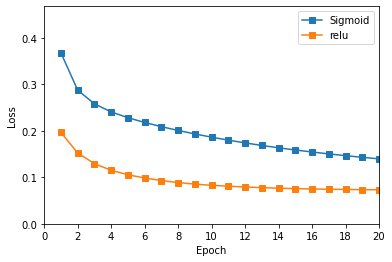

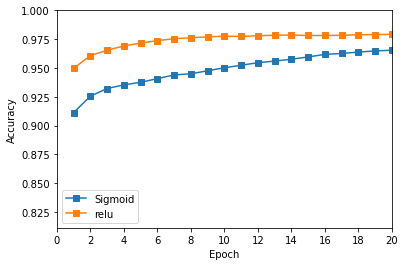

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 具有两层隐含层的多层感知机

接下来，根据案例要求，还需要完成**构造具有两个隐含层的多层感知机，自行选取合适的激活函数和损失函数，与只有一个隐含层的结果相比较**.

注意: 请在下方插入新的代码块，不要直接修改上面的代码.

In [22]:
twoLayerMLP = Network()
twoLayerMLP.add(FCLayer(784, 128))
twoLayerMLP.add(ReLULayer())
twoLayerMLP.add(FCLayer(128, 64))
twoLayerMLP.add(ReLULayer())
twoLayerMLP.add(FCLayer(64, 10))

In [23]:
twoLayerMLP, tl_loss, tl_acc = train(twoLayerMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.7464	 Accuracy 0.0800
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.9401	 Accuracy 0.7318
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.6946	 Accuracy 0.7993
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.5939	 Accuracy 0.8270
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.5260	 Accuracy 0.8469
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.4790	 Accuracy 0.8607
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.4458	 Accuracy 0.8703
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.4198	 Accuracy 0.8775
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.3983	 Accuracy 0.8835
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.3799	 Accuracy 0.8890
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.3669	 Accuracy 0.8924

Epoch [0]	 Average training loss 0.3542	 Average training accuracy 0.8964
Epoch [0]	 Average validation loss 0.1739	 Average validation accuracy 0.9532

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.2057	 Accuracy 0.9600


Epoch [8]	 Average training loss 0.0424	 Average training accuracy 0.9893
Epoch [8]	 Average validation loss 0.0819	 Average validation accuracy 0.9770

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0250	 Accuracy 0.9900
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0366	 Accuracy 0.9912
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0384	 Accuracy 0.9909
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0377	 Accuracy 0.9907
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0369	 Accuracy 0.9909
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0357	 Accuracy 0.9910
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0357	 Accuracy 0.9913
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0358	 Accuracy 0.9913
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0359	 Accuracy 0.9913
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0361	 Accuracy 0.9913
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0368	 Accuracy 0.9912

Epoch [9]	 Average training loss 0.0366	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.0111	 Accuracy 0.9986
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0114	 Accuracy 0.9986
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0112	 Accuracy 0.9986
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0113	 Accuracy 0.9985

Epoch [17]	 Average training loss 0.0111	 Average training accuracy 0.9985
Epoch [17]	 Average validation loss 0.0840	 Average validation accuracy 0.9788

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0052	 Accuracy 1.0000
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0106	 Accuracy 0.9984
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0115	 Accuracy 0.9985
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0104	 Accuracy 0.9989
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0101	 Accuracy 0.9989
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0097	 Accuracy 0.9990
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0096	 Accuracy 0.9990
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0097	

In [24]:
test(twoLayerMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9776.



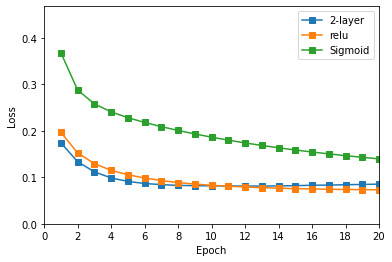

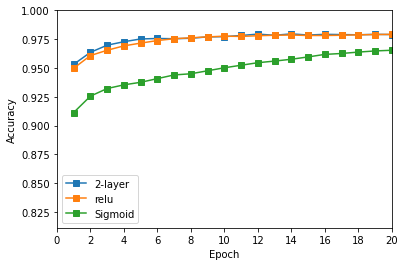

In [25]:
plot_loss_and_acc({'2-layer': [tl_loss, tl_acc],
                   'relu': [relu_loss, relu_acc],
                   'Sigmoid': [sigmoid_loss, sigmoid_acc]})